In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.dropna(inplace=True)

In [5]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
class CustomRandomForest:
    def __init__(self, n_estimators=10, max_features='sqrt'):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.trees = []

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X.iloc[idxs], y.iloc[idxs]

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(max_features=self.max_features)
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.round(tree_preds.mean(axis=0)).astype(int)

In [8]:
rf = CustomRandomForest(n_estimators=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8183060109289617
Precision: 0.39215686274509803
Recall: 0.16393442622950818
F1 Score: 0.23121387283236994


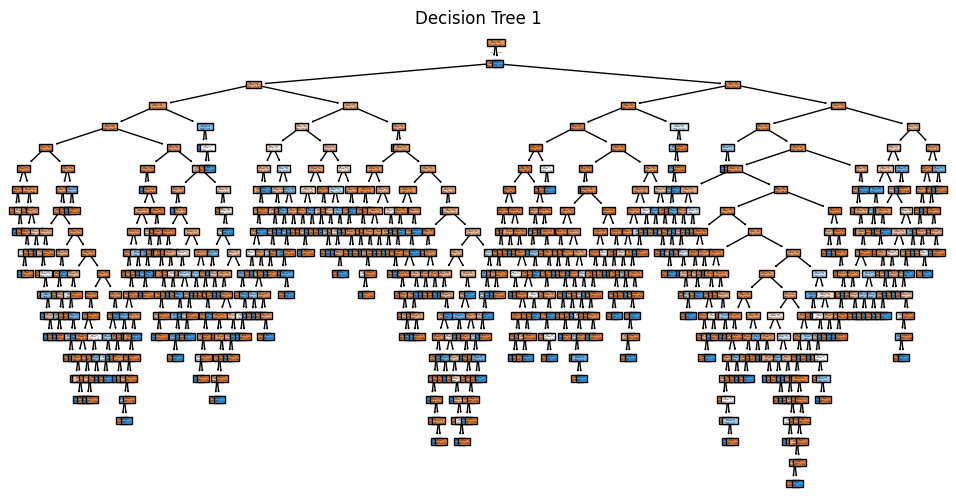

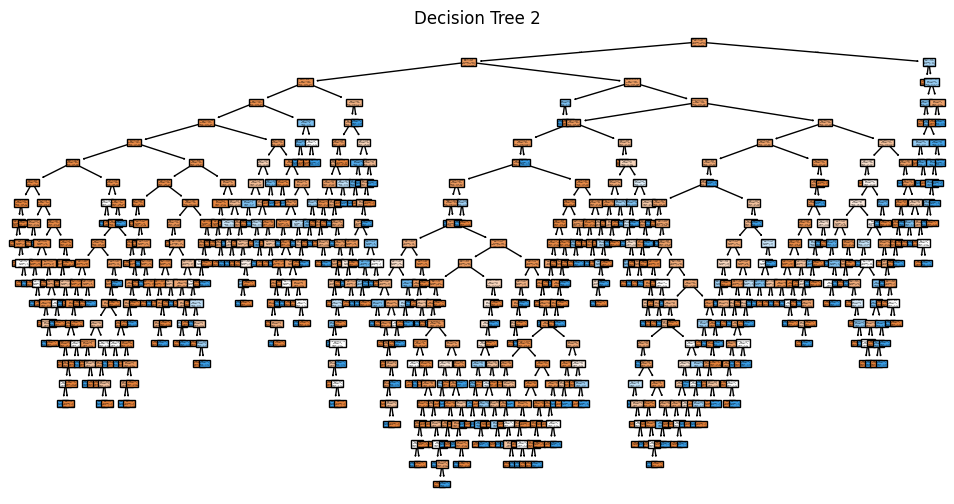

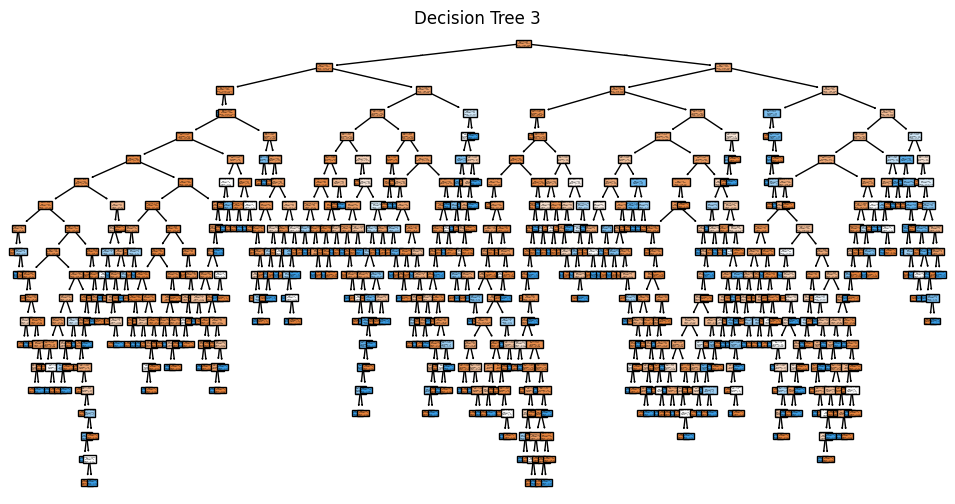

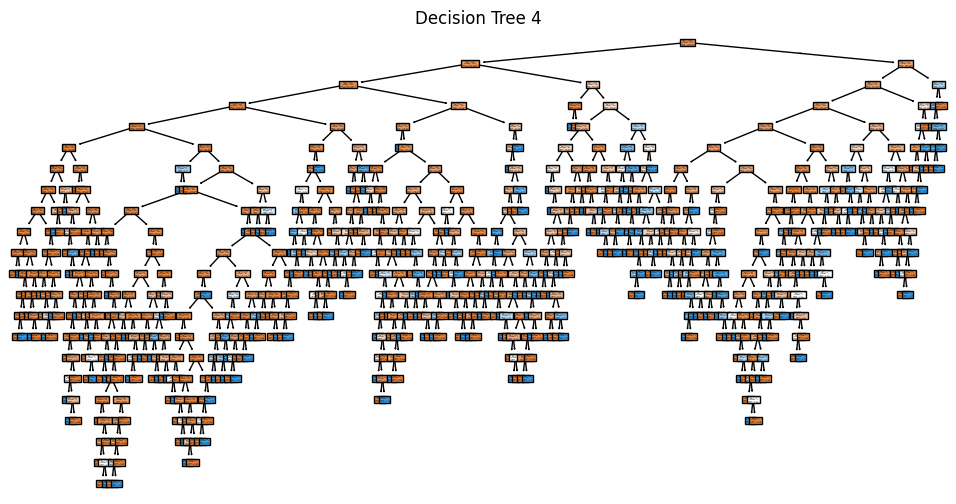

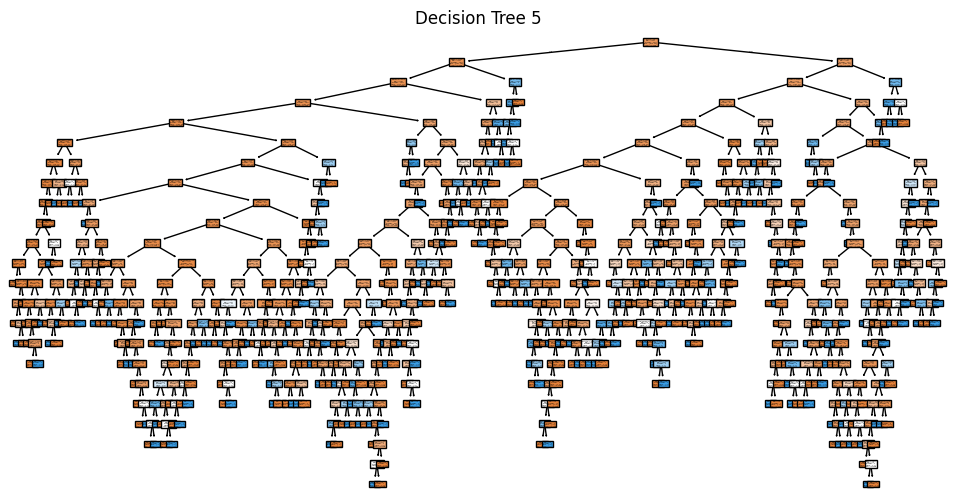

In [10]:
for i, tree in enumerate(rf.trees):
    plt.figure(figsize=(12, 6))
    plot_tree(tree, feature_names=X.columns, class_names=['No CHD', 'CHD'], filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()